<a href="https://colab.research.google.com/github/kwanhong66/TodayILearned/blob/master/kaggle/bike_sharing_demand_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description

*   datetime - hourly date + timestamp
*   season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
*   holiday - whether the day is considered a holiday
*   workingday - whether the day is neither a weekend nor holiday
*   weather
    *   1: Clear, Few clouds, Partly cloudy, Partly cloudy
    *  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    *  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp - temperature in Celsius
*   atemp - "feels like" temperature in Celsius
*   humidity - relative humidity
*   windspeed - wind speed
*   casual - number of non-registered user rentals initiated
*   registered - number of registered user rentals initiated
*   count - number of total rentals

*  Link - https://www.kaggle.com/c/bike-sharing-demand

In [1]:
!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


## Import packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.font_manager as fm

import os

%matplotlib inline

# ggplot style 격자로 숫자 범위가 잘 보이기 위해
plt.style.use('ggplot')

# minus 글씨 깨지는 문제
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
mpl.font_manager._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.fname]

[('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf')]

In [5]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Load train data

In [6]:
data_root_dir = '/content/drive/My Drive/Colab Notebooks/data'
train = pd.read_csv(os.path.join(data_root_dir, 'bike-sharing-demand/train.csv'), parse_dates=['datetime'])
train.shape

(10886, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [9]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

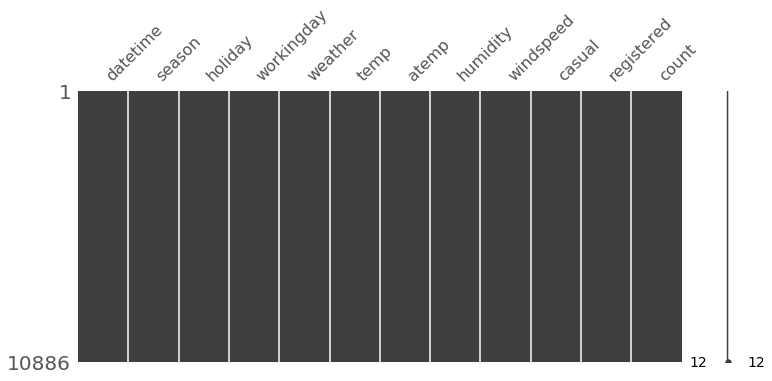

In [11]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

## Explore and refine train data

In [12]:
# parse datetime into another column
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [0]:
# 전역으로 폰트 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.rcParams["font.size"] = 10

In [0]:
plt.rcParams

In [0]:
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/

In [17]:
!ls /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

cmb10.ttf			NanumGothicBold.ttf
cmex10.ttf			NanumGothic.ttf
cmmi10.ttf			NanumMyeongjoBold.ttf
cmr10.ttf			NanumMyeongjo.ttf
cmss10.ttf			NanumSquareB.ttf
cmsy10.ttf			NanumSquareRoundB.ttf
cmtt10.ttf			NanumSquareRoundR.ttf
DejaVuSans-BoldOblique.ttf	NanumSquareR.ttf
DejaVuSans-Bold.ttf		STIXGeneralBolIta.ttf
DejaVuSansDisplay.ttf		STIXGeneralBol.ttf
DejaVuSansMono-BoldOblique.ttf	STIXGeneralItalic.ttf
DejaVuSansMono-Bold.ttf		STIXGeneral.ttf
DejaVuSansMono-Oblique.ttf	STIXNonUniBolIta.ttf
DejaVuSansMono.ttf		STIXNonUniBol.ttf
DejaVuSans-Oblique.ttf		STIXNonUniIta.ttf
DejaVuSans.ttf			STIXNonUni.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizFiveSymReg.ttf
DejaVuSerif-Bold.ttf		STIXSizFourSymBol.ttf
DejaVuSerifDisplay.ttf		STIXSizFourSymReg.ttf
DejaVuSerif-Italic.ttf		STIXSizOneSymBol.ttf
DejaVuSerif.ttf			STIXSizOneSymReg.ttf
LICENSE_DEJAVU			STIXSizThreeSymBol.ttf
LICENSE_STIX			STIXSizThreeSymReg.ttf
NanumBarunGothicBold.ttf	STIXSizTwoSymBol.ttf
NanumBarunGothic.ttf		STIXSizTwoSymReg.ttf


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Rents by second')]

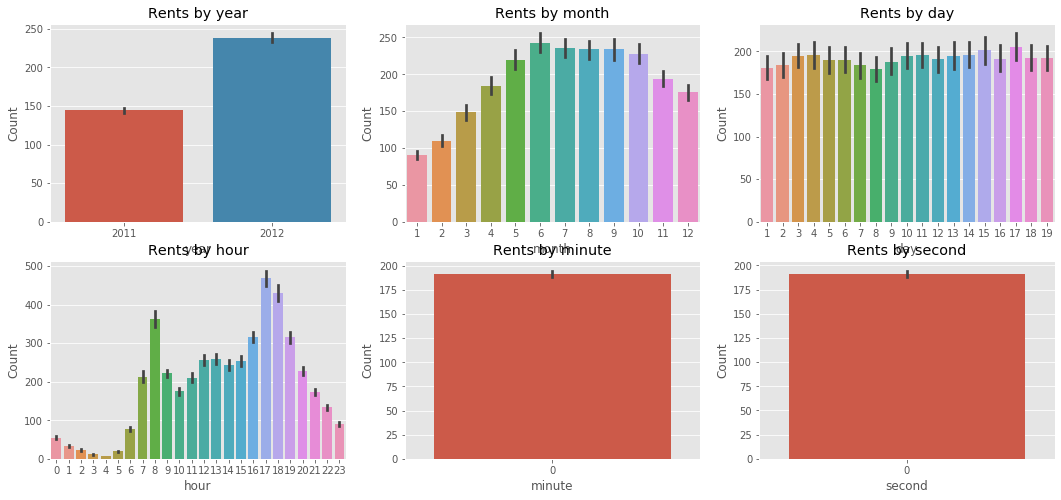

In [29]:
# 주요 특징별 대여량을 그래프로 확인
# barplot
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(x='year', y='count', data=train, ax=ax1)
sns.barplot(x='month', y='count', data=train, ax=ax2)
sns.barplot(x='day', y='count', data=train, ax=ax3)
sns.barplot(x='hour', y='count', data=train, ax=ax4)
sns.barplot(x='minute', y='count', data=train, ax=ax5)
sns.barplot(x='second', y='count', data=train, ax=ax6)


ax1.set(ylabel='Count', title='Rents by year')
ax2.set(ylabel='Count', title='Rents by month')
ax3.set(ylabel='Count', title='Rents by day')
ax4.set(ylabel='Count', title='Rents by hour')
ax5.set(ylabel='Count', title='Rents by minute')
ax6.set(ylabel='Count', title='Rents by second')

* 연도별 대여량은 2012년이 2011년 보다 많다.
* 월별 대여량은 1월에 가정 적고, 6월에 가장 높다.
* 일별 대여량은 1일부터 19일까지, 나머지 날짜는 test.csv에 있기 때문에 특징으로 사용 불가능
* 시간 대여량은 출퇴근 시간, 주중/주말 구분 없이는 어려움
* 분, 초는 다 0이라서 의미 없음

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Rents by workinday')]

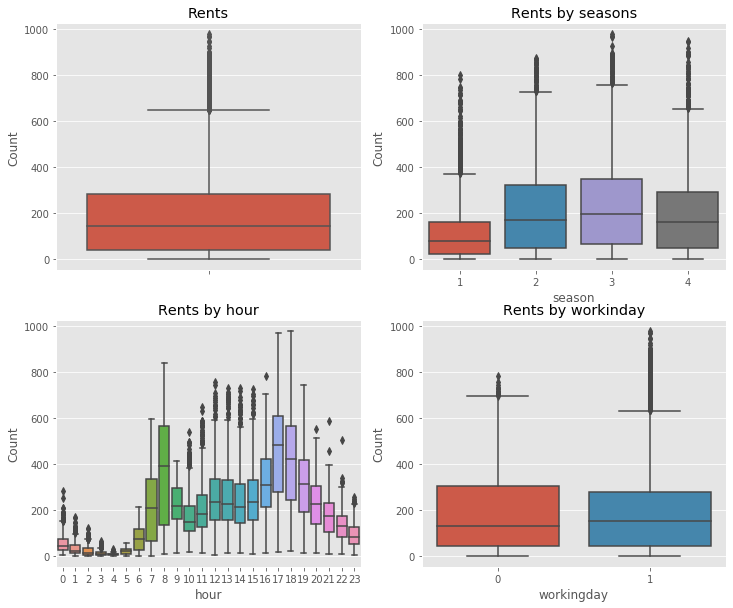

In [34]:
# boxplot
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[1][1])

axes[0][0].set(ylabel='Count', title='Rents')
axes[0][1].set(ylabel='Count', title='Rents by seasons')
axes[1][0].set(ylabel='Count', title='Rents by hour')
axes[1][1].set(ylabel='Count', title='Rents by workinday')

In [37]:
# dayofweek; 무슨 요일
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [38]:
# 0-6
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

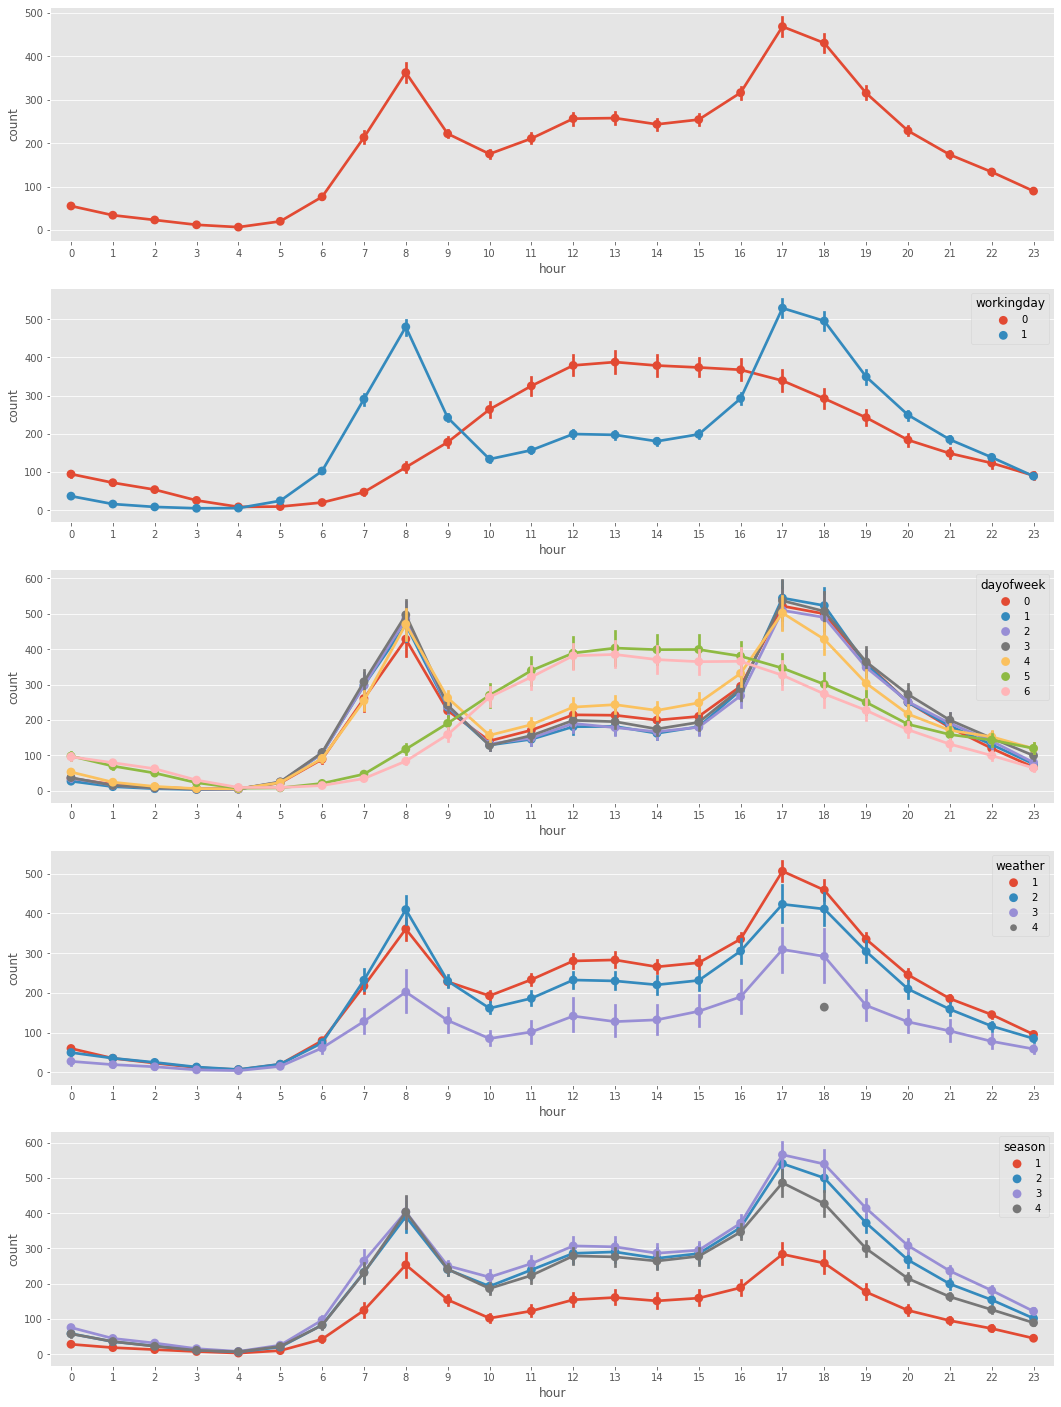

In [41]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2) # workingday
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3) # dayofweek
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4) # weather
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5) # season

In [45]:
# for heatmap, create confusion matrix
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
# https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.tril_indices_from.html
# Return the indices for the lower-triangle of arr.
print(np.tril_indices_from(mask))
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]
(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6]), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 5, 6]))


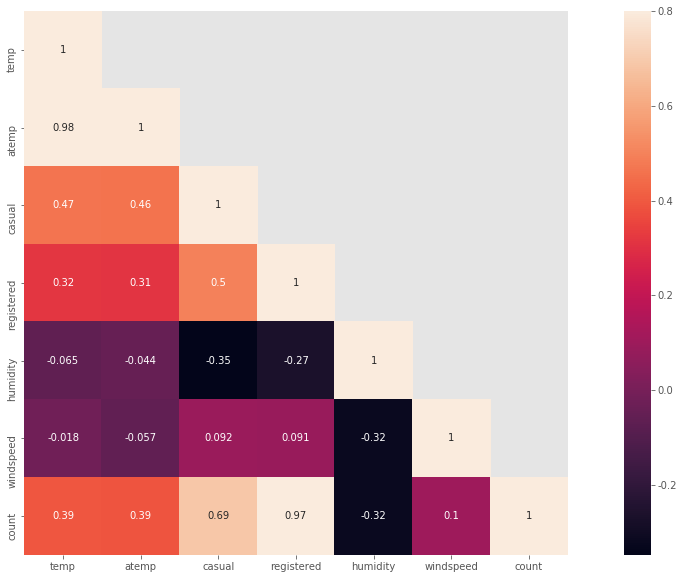

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

* temp, humidity, windspeed는 대여량(count)와 상관관계가 낮음
* 대여량과 가장 연관이 높은건 registered로 등록 된 대여자, test 데이터에는 이 값이 없다.
* temp와 atemp는 0.98로 상관관계가 높지만, 특징 사용 고려 필요

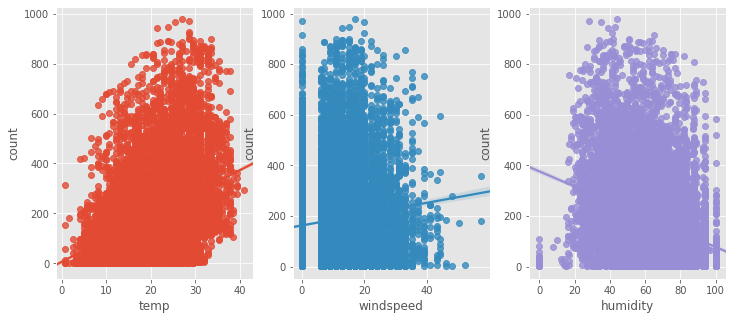

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# http://doc.mindscale.kr/km/python/11.html
# https://rfriend.tistory.com/413
# https://medium.com/@kathy.lu.rentals/visualizing-with-seaborn-regplot-2235ccbaedd4
# scatterplot, regplot 산점도
sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)

In [50]:
def concatenate_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


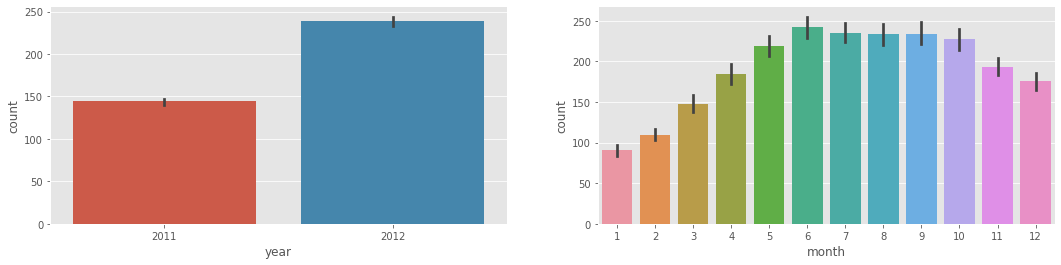

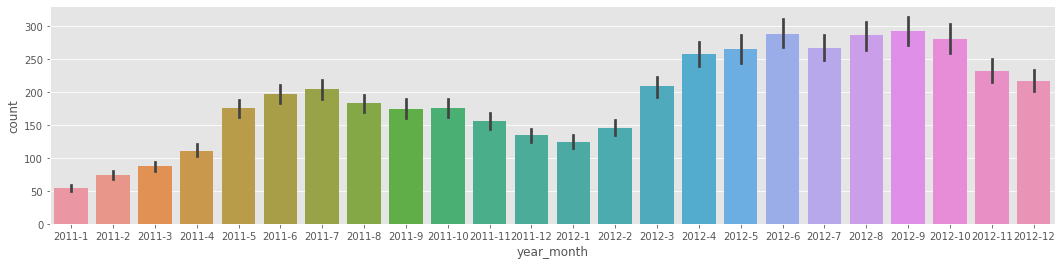

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

* 2011년보다 2012년의 대여량이 더 많음
* 겨울보다는 여름의 대여량이 많음
* 2011년부터 2012년까지 월별 대여량은 지속적으로 증가 추세

In [52]:
# train without outliers
# under 3 sigma
trainWithoutOutlieres = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutlieres.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

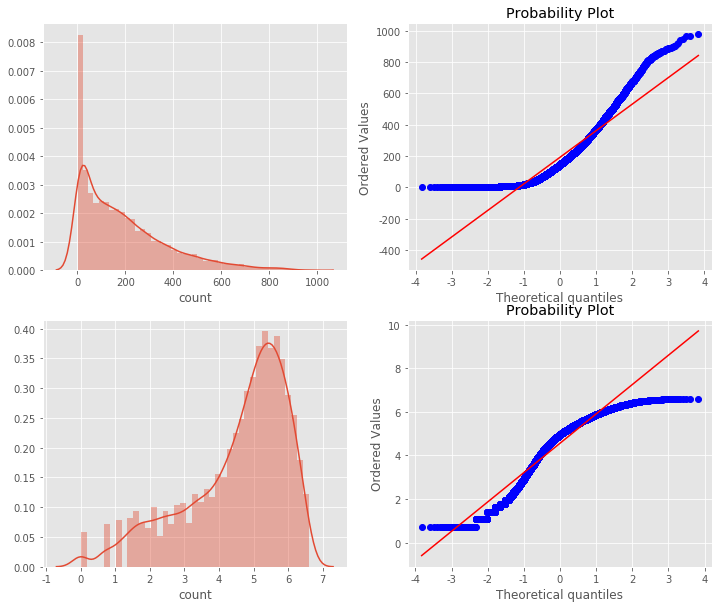

In [57]:
# distribution of count value

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train['count'], ax=axes[0][0])
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# normality test
# Q-Q plot to see normality
# Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)으로 그린 것
# https://datascienceschool.net/view-notebook/26f1850cd89f419993db0648bbd3c900/#Q-Q-%ED%94%8C%EB%A1%AF
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutlieres['count']), ax=axes[1][0])
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html
# https://stackoverflow.com/questions/49538185/what-is-the-purpose-of-numpy-log1p
stats.probplot(np.log1p(trainWithoutOutlieres['count']), dist='norm', fit=True, plot=axes[1][1])

* count 변수의 분포가 치우쳐져 있음
* 대부분의 기계학습은 종속 변수가 normal이어야 함(정규분포)
* Outlier를 제거하고 count에 log를 씌워도 정규분포를 따르지 않지만, Q-Q plot(probplot)을 보면, 가공 전보다 비교적 정규성을 얻음